In [1]:
import json
import re
import sys
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import pytagcloud
import pandas as pd
from pandas import Series, DataFrame    

In [2]:
def showGraph(dust):
    font_location="C:\Windows\Fonts\HYKANB.ttf"
    font_name=font=font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font',family=font_name)
    plt.xlabel('주요단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values=sorted(dust.values(),reverse=True)
    Sorted_Dict_Keys=sorted(dust, key=dust.get, reverse=True)
    plt.bar(range(len(dust)),Sorted_Dict_Values,align='center')
    plt.xticks(range(len(dust)),list(Sorted_Dict_Keys),rotation='70') 
    plt.show()

In [3]:
def saveWorldCloud(wordInfo, filename): 
    taglist=pytagcloud.make_tags(dict(wordInfo).items(),maxsize=80)
    pytagcloud.create_tag_image(taglist,filename,size=(1024,768),fontname='kor',rectangular=False)

In [4]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list 

In [5]:
def main():
    openFileName='김정은_naver.json'
    output_file_Name = '김정은(word파일).json'
    cloudImageFile='wordcloud_KimJunEn.jpg'
    rfile=open(openFileName, 'r', encoding='utf-8').read()
    open_output_file= open(output_file_Name, 'w', encoding='utf-8')
    jsonData=json.loads(rfile)
    message=""
    for item in jsonData:
        if 'description' in item.keys():
            message=message+re.sub(r'[^\w]', '', item['description'])+'' 
            
    nlp=Twitter()
    nouns=nlp.nouns(message)
    count=Counter(nouns)
    
    wordInfo=dict()
    for tags, counts in count.most_common(50):
        if (len(str(tags))>1):
            wordInfo[tags]=counts
            print("%s : %d" % (tags, counts))

    open_output_file.write('{} {}\n'.format(nouns, count)) 
    saveWorldCloud(wordInfo,cloudImageFile)


In [7]:
if __name__=="__main__":
    main()

김정은 : 1419
북한 : 999
국무위원 : 677
대통령 : 521
정상회담 : 245
트럼프 : 240
미국 : 223
위원장 : 220
문재인 : 200
중국 : 190
남북정상회담 : 188
남북 : 169
북미 : 168
비핵화 : 158
위원 : 145
회담 : 143
판문점 : 137
하나 : 133
지난 : 125
폼페이 : 124
시간 : 111
도널드 : 109
지난달 : 102
경제 : 100
선언 : 98
통일 : 92
원장 : 87
장관 : 86
위해 : 85
한반도 : 84
사항 : 83
이후 : 77
대한 : 73
고위 : 73
방중 : 73
노동당 : 70
체제 : 69
싱가포르 : 66
평화 : 64
이행 : 62
조치 : 61


In [19]:
KimJunEn = pd.DataFrame([{'주요단어' : '김정은', '빈도수' : '1467'},
                         {'주요단어' : '북한', '빈도수' : '905'},
                         {'주요단어' : '대통령', '빈도수' : '688'},
                         {'주요단어' : '국무위원', '빈도수' : '661'},
                         {'주요단어' : '트럼프', '빈도수' : '577'},
                         {'주요단어' : '싱가포르', '빈도수' : '374'},
                         {'주요단어' : '정상회담', '빈도수' : '335'},
                         {'주요단어' : '미국', '빈도수' : '322'},
                         {'주요단어' : '위원장', '빈도수' : '276'},
                         {'주요단어' : '북미', '빈도수' : '276'},
                         {'주요단어' : '회담', '빈도수' : '247'},
                         {'주요단어' : '도널드','빈도수' : '208'},
                         {'주요단어' : '폼페이', '빈도수' : '198'},
                         {'주요단어' : '장관', '빈도수' : '157'},
                         {'주요단어' : '평화', '빈도수' : '153'},
                         {'주요단어' : '비핵화', '빈도수' : '142'},
                         {'주요단어' : '문재인', '빈도수' : '137'},
                         {'주요단어' : '위원', '빈도수' : '109'},
                         {'주요단어' : '역사', '빈도수' : '97'},
                         {'주요단어' : '장소', '빈도수' : '94'},
                         {'주요단어' : '중국', '빈도수' : '89'},
                         {'주요단어' : '남북정상회담', '빈도수' : '83'},
                         {'주요단어' : '기자', '빈도수' : '82'},
                         {'주요단어' : '대화', '빈도수' : '79'},
                         {'주요단어' : '위해', '빈도수' : '77'},
                         {'주요단어' : '청와대', '빈도수' : '74'},
                         {'주요단어' : '지난', '빈도수' : '74'},
                         {'주요단어' : '한반도', '빈도수' : '74'},
                         {'주요단어' : '판문점', '빈도수' : '71'},
                         {'주요단어' : '평양', '빈도수' : '67'},
                         {'주요단어' : '통화', '빈도수' : '67'},
                         {'주요단어' : '총리', '빈도수' : '63'},
                         {'주요단어' : '번영', '빈도수' : '63'},
                         {'주요단어' : '시간', '빈도수' : '62'},
                         {'주요단어' : '정상', '빈도수' : '62'},
                         {'주요단어' : '사진', '빈도수' : '60'},    
                         {'주요단어' : '한국', '빈도수' : '59'},
                         {'주요단어' : '통해', '빈도수' : '57'},
                         {'주요단어' : '개최', '빈도수' : '55'},
                         {'주요단어' : '만남', '빈도수' : '54'},
                         {'주요단어' : '트위터', '빈도수' : '54'},
                         {'주요단어' : '현지', '빈도수' : '53'},
                         {'주요단어' : '일본', '빈도수' : '52'},
                         {'주요단어' : '연합뉴스', '빈도수' : '51'},
                         {'주요단어' : '미래', '빈도수' : '50'},
                         {'주요단어' : '남북', '빈도수' : '49'},
                         {'주요단어' : '경제', '빈도수' : '49'},
                         {'주요단어' : '지난달', '빈도수' : '48'},
                         {'주요단어' : '전용기', '빈도수' : '47'},
                         {'주요단어' : '협상', '빈도수' : '46'}])
                         

In [20]:
KimJunEn.to_csv("김정은.csv",encoding="cp949",mode="w",index=True)

In [9]:
KimJunEn

빈도수    주요단어
0   1467     김정은
1    905      북한
2    688     대통령
3    661    국무위원
4    577     트럼프
5    374    싱가포르
6    335    정상회담
7    322      미국
8    276     위원장
9    276      북미
10   247      회담
11   208     도널드
12   198     폼페이
13   157      장관
14   153      평화
15   142     비핵화
16   137     문재인
17   109      위원
18    97      역사
19    94      장소
20    89      중국
21    83  남북정상회담
22    82      기자
23    79      대화
24    77      위해
25    74     청와대
26    74      지난
27    74     한반도
28    71     판문점
29    67      평양
30    67      통화
31    63      총리
32    63      번영
33    62      시간
34    62      정상
35    60      사진
36    59      한국
37    57      통해
38    55      개최
39    54      만남
40    54     트위터
41    53      현지
42    52      일본
43    51    연합뉴스
44    50      미래
45    49      남북
46    49      경제
47    48     지난달
48    47     전용기
49    46      협상

In [10]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10) 

In [11]:
x=KimJunEn['주요단어']

In [12]:
y=KimJunEn['빈도수']

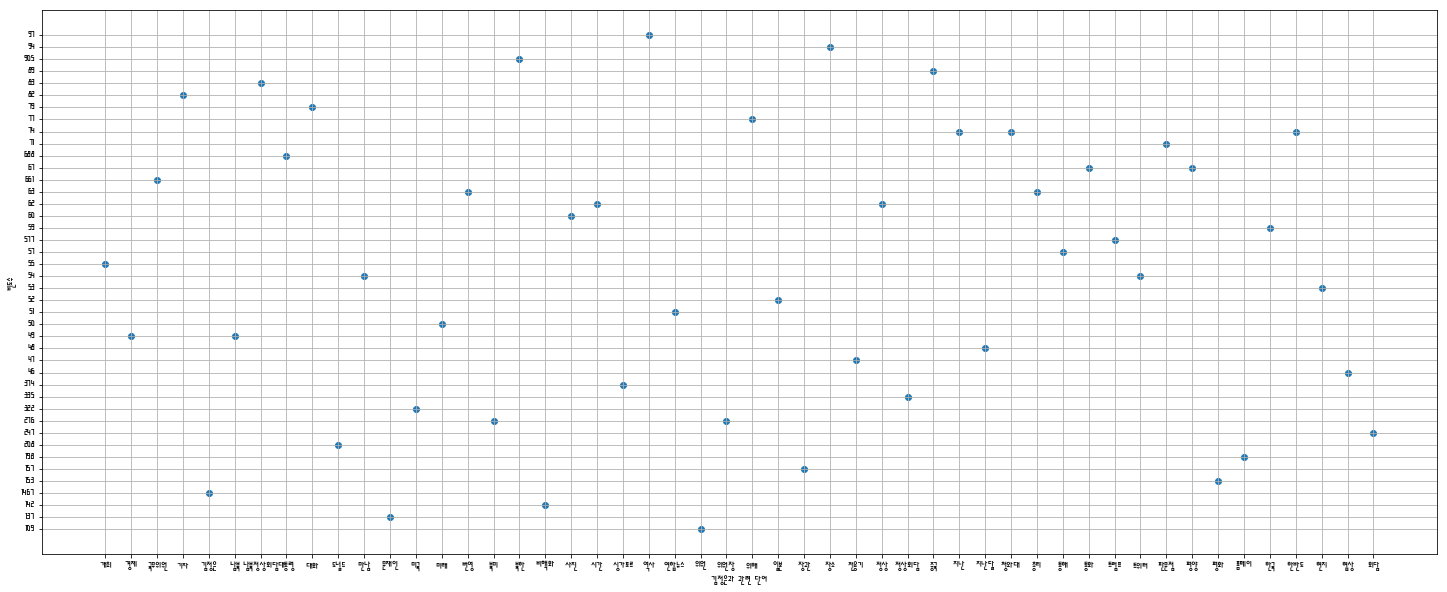

In [13]:
plt.xlabel('김정은과 관련 단어')
plt.ylabel('빈도수')
plt.grid(True)

plt.scatter(x,y)

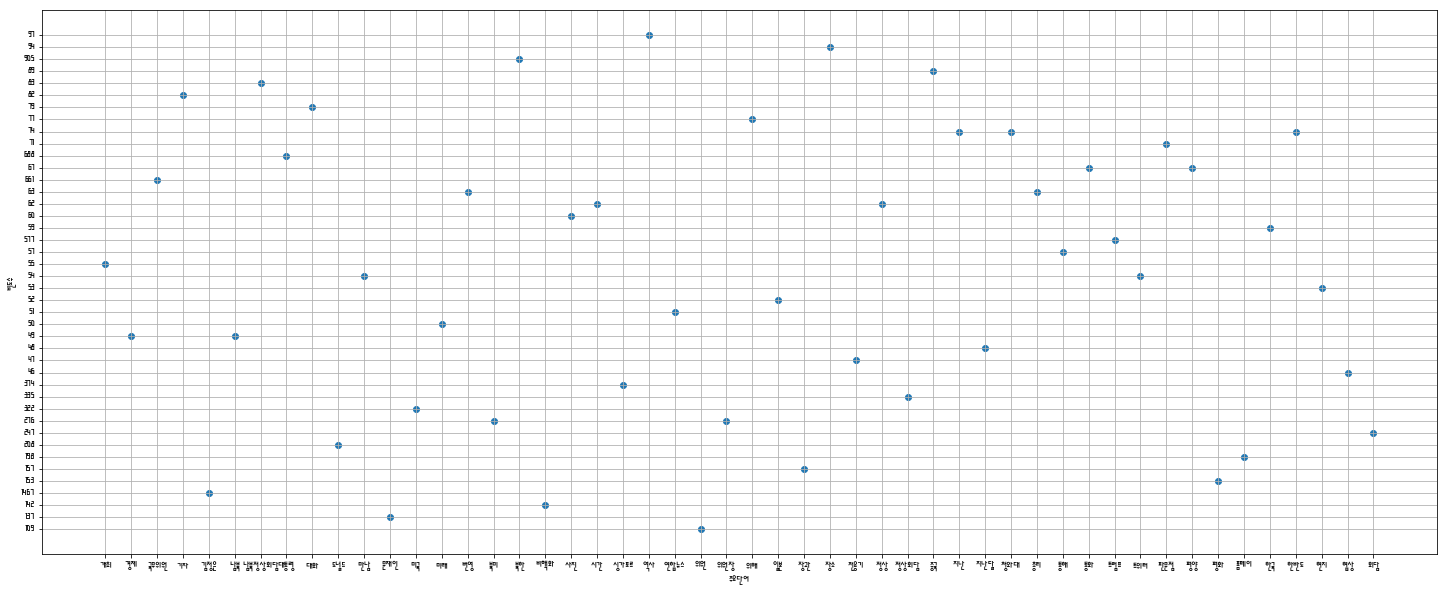

In [14]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10) 

x=KimJunEn['주요단어']
y=KimJunEn['빈도수']

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
plt.scatter(x,y)

In [15]:
KimJunEn_D = pd.Series(KimJunEn.빈도수, dtype ='i')
KimJunEn_N = pd.Series(KimJunEn.주요단어)

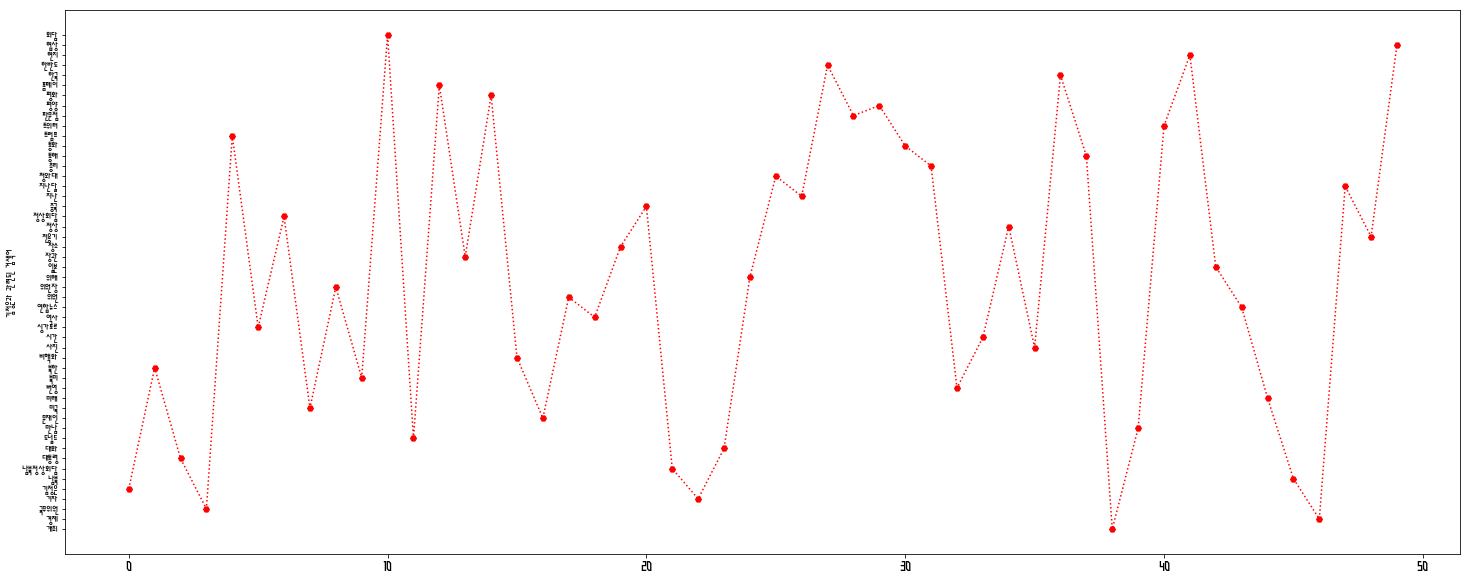

In [16]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.plot(KimJunEn.index, KimJunEn_N, 'rH:') 
plt.ylabel('김정은과 관련된 검색어') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()

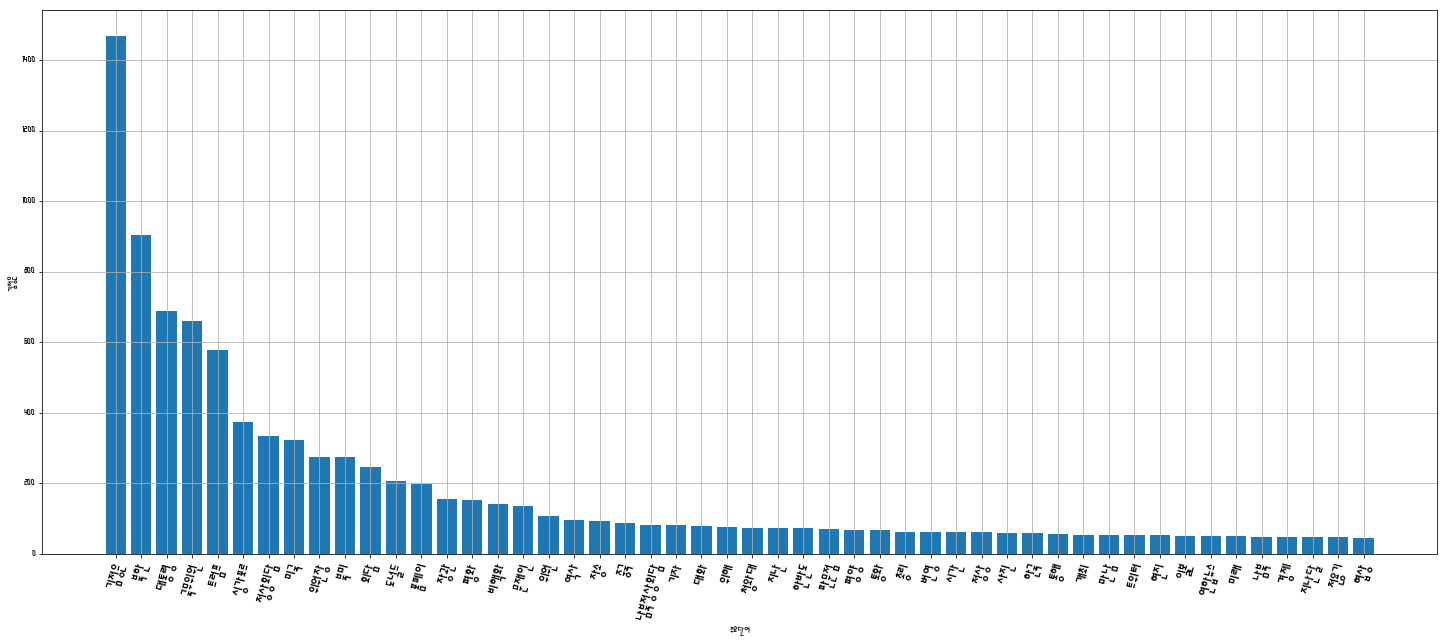

In [17]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
    
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(KimJunEn.index, KimJunEn_D)#,) 'cH:', lw=5, ms=10) 
plt.xticks(KimJunEn.index, KimJunEn_N, rotation='75')
plt.ylabel('김정은')
matplotlib.pyplot.xticks(fontsize=16)
plt.show()

In [ ]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.plot(KimJunEn.index, KimJunEn_N, 'rH:') 
plt.ylabel('김정은') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()